In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('/Users/lambardaar/Desktop/STUDY/python/ml/class_practice/dataset/Salary.csv')
df.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


In [11]:
X=df[['YearsExperience']]
y=df[['Salary']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)



In [12]:
lr=LinearRegression()
lr.fit(X_train,y_train)

pred=lr.predict(X_test)

score=r2_score(y_test,pred)
score2=mean_squared_error(y_test,pred)
print(score)
print(score2)


0.9553063138044949
35301898.88713489


In [13]:
new_age = 5
exp_array=np.array([[new_age]])
pred_sal=lr.predict(exp_array)
pred_sal



array([[198257.17436158]])

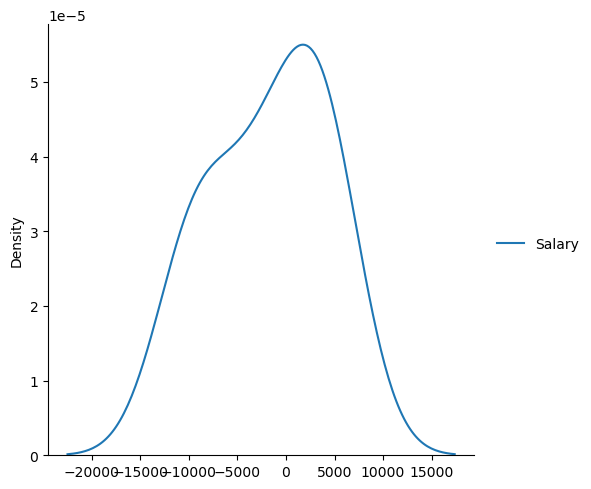

In [14]:
sns.displot(pred - y_test, kind='kde')

plt.show()

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/Users/lambardaar/Desktop/STUDY/python/ml/class_practice/dataset/Salary.csv')
X = df[['YearsExperience']]
y = df[['Salary']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test)
score = r2_score(y_test, pred)
score2 = mean_squared_error(y_test, pred)
print("R2 Score:", score)
print("Mean Squared Error:", score2)

new_exp = 5
exp_array = np.array([[new_exp]])
exp_array_scaled = sc.transform(exp_array)
pred_sal = lr.predict(exp_array_scaled)
print("Predicted Salary for 5 years experience:", pred_sal[0][0])




R2 Score: 0.9553063138044949
Mean Squared Error: 35301898.88713489
Predicted Salary for 5 years experience: 72454.5292246185


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


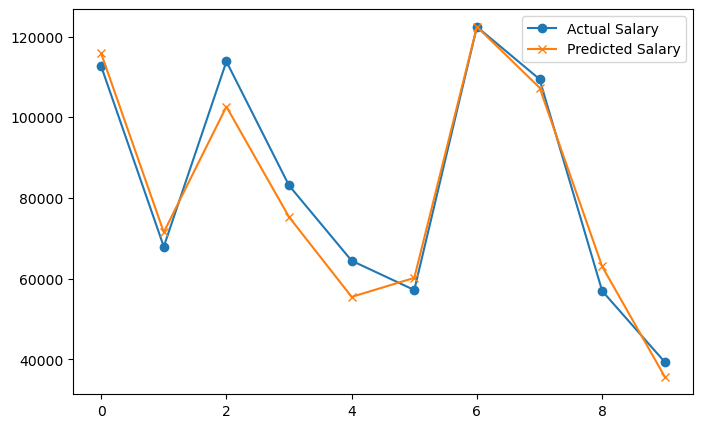

In [16]:
y_test_reset = y_test.reset_index(drop=True)

plt.figure(figsize=(8,5))
plt.plot(y_test_reset, label="Actual Salary", marker='o')
plt.plot(pred, label="Predicted Salary", marker='x')
plt.legend()
plt.show()

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('/Users/lambardaar/Desktop/STUDY/python/ml/class_practice/dataset/Salary.csv')
df.head(2)



,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


In [18]:
X=df.drop('Salary',axis=1)
y=df['Salary']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred=lr.predict(X_test)

print(r2_score(y_test,y_pred))

0.9024461774180498


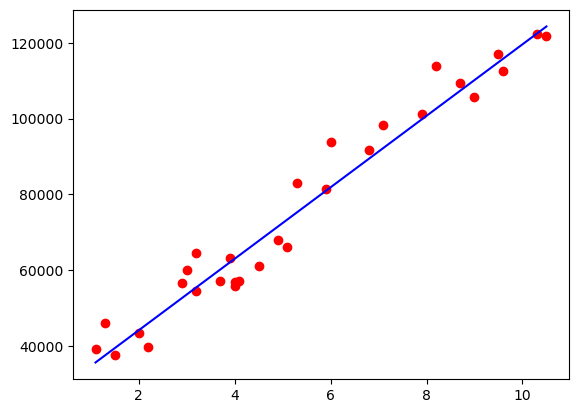

In [21]:
import matplotlib.pyplot as plt
plt.scatter(X,y,color="red")
plt.plot(X,lr.predict(X),color="blue")

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [41]:
df=pd.read_csv('/Users/lambardaar/Desktop/STUDY/python/ml/class_practice/dataset/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [43]:
df.dropna(subset=['Cabin'], inplace=True)
df.dropna(subset=['Age'], inplace=True)

In [44]:
sex=pd.get_dummies(df['Sex'],drop_first=True,dtype=int)
sex.head()

,male
12,0
14,0
24,0
26,0
28,1


In [45]:
embarked=pd.get_dummies(df["Embarked"],drop_first=True,dtype=int)
embarked.head()

,Q,S
12,0,1
14,0,1
24,0,0
26,0,0
28,0,1


In [46]:
df=pd.concat([df,sex,embarked],axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,0,0,1
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,0,0,1
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,0,0,0
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,0,0,0
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,0,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C,1,0,0
405,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C,1,0,0
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,1,0,0
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,0,1,0


In [47]:
df=df.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
12,1,1,23.0,1,0,82.2667,B45,0,0,1
14,1,1,47.0,1,0,61.1750,E31,0,0,1
24,1,1,48.0,1,3,262.3750,B57 B59 B63 B66,0,0,0
26,1,1,22.0,0,1,61.9792,B36,0,0,0
28,0,1,41.0,0,0,30.5000,A21,1,0,1


In [50]:
X_numeric = df.drop(['Survived', 'Cabin'], axis=1)
y = df['Survived']
corr = pd.concat([X_numeric, y], axis=1).corr()
print(corr['Survived'].sort_values(ascending=False))


Survived    1.000000
Parch       0.181554
Fare        0.179047
SibSp       0.170596
Q           0.106600
S           0.058981
Age         0.022983
Pclass     -0.056699
male       -1.000000
Name: Survived, dtype: float64


In [51]:
X_train,X_test,y_train,y_test=train_test_split(X_numeric,y)
print(X_train.equals(X_test))
print(y_train.equals(y_test))

False
False


In [52]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression(max_iter=1000)
lm.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [53]:
pre=lm.predict(X_test)
pre

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
classification_report(y_test,pre)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        14\n           1       1.00      1.00      1.00         8\n\n    accuracy                           1.00        22\n   macro avg       1.00      1.00      1.00        22\nweighted avg       1.00      1.00      1.00        22\n'

In [55]:
confusion_matrix(y_test,pre)

array([[14,  0],
       [ 0,  8]])